# Project 2 : Data Visualization of International Visitors to London

In [2]:
#Importing Pandas Library for Data Manipulation
import pandas as pd
#Importing Seaborn Library for Data Visualization
import seaborn as sns
#Importing Matplot Library for Data Visualization
import matplotlib.pyplot as plt
#Setting the color codes to True
sns.set(color_codes=True)

Loading data into a pandas dataframe from the URL and printing out its sample.

In [16]:
file_data = pd.read_csv('https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv',encoding='unicode_escape')
file_data.head(10)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1
5,2002,January-March,Belgium,1-3 nights,Sea,Miscellaneous,LONDON,0.590807,0.003953,1.772420,1
6,2002,January-March,Belgium,1-3 nights,Tunnel,Holiday,LONDON,10.940251,2.765473,23.242688,30
7,2002,January-March,Belgium,1-3 nights,Tunnel,Business,LONDON,6.052632,1.446697,10.428555,16
8,2002,January-March,Belgium,1-3 nights,Tunnel,VFR,LONDON,5.559403,0.468140,9.441416,13
9,2002,January-March,Belgium,1-3 nights,Tunnel,Miscellaneous,LONDON,0.704948,0.465721,1.409894,2


By looking at the sample of the dataset, we can figure out the columns and the type of data that they contain.
1. Year- Year in which the passengers travelled
2. Quarter- In which quarter of the year the passenger travelled 
3. Market- From which part of the world the passenger travelled
4. Dur_stay- Duration of the passenger stay in London
5. Purpose- Purpose of their travel to London
6. Area- The value for this will be London for all the rows
7. Visits- This will be the number of visits in thousands from each market in each quarter of a year 
8. Spend- This will be the amount spend by the passenger in million Euros
9. Nights- This will be the number of nights spent in London in thousands from each market in each quarter of a year
10. Sample- This will be the number of Passengers travelledGet the idea of the size of data points by printing its shape. from each market in each quarter of a year

Getting the idea of the size of data by printing its shape.

In [17]:
file_data.shape

(61462, 11)

Generating the descriptive statistics

In [18]:
file_data.describe()

,Visits (000s),Spend (£m),Nights (000s),sample
count,61462.000000,61462.000000,61462.000000,61462.000000
mean,4.927651,3.086634,30.300852,6.099021
std,10.061362,7.243874,61.898302,13.335820
min,0.000103,0.000000,0.000309,1.000000
25%,0.822888,0.321693,3.901581,1.000000
50%,1.797305,1.047351,10.676935,2.000000
75%,4.416618,3.007542,29.483044,5.000000
max,187.487282,373.232590,2492.178513,299.000000


Observation from statistics:
1. There are no Null values in the columns Visits, Spend, Nights and sample. Since its count matched with the total rows of the column.
2. The average sample size stayed in London is 6, The Maximum sample size is 299 and the minimum sample size is 1
3. The Maximum amount of spend is around 373 Million Euros.

# Hypothesis: For what purpose are people traveling more?

C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count for each purpose of travel')

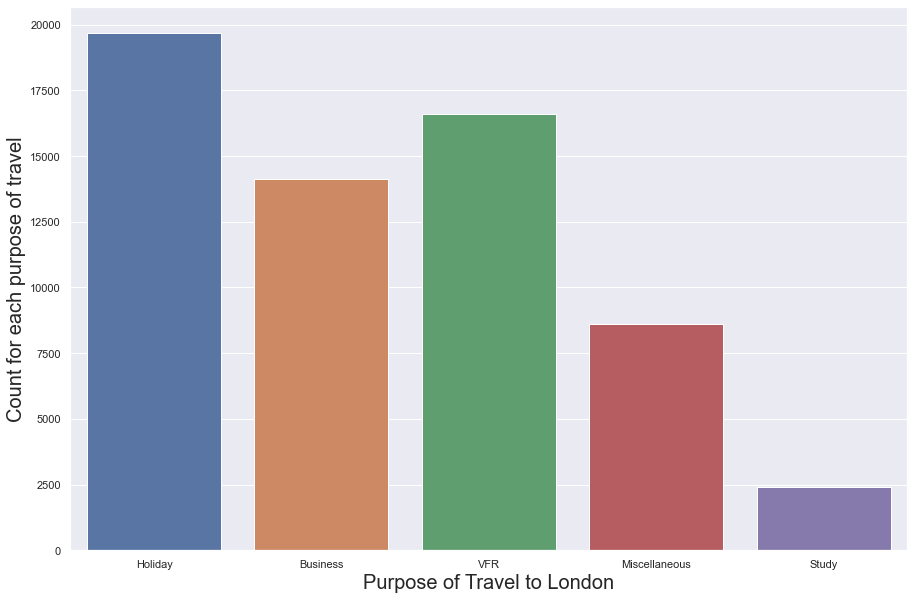

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
seaborn_plot = sns.countplot(file_data['purpose'])
seaborn_plot.set_xlabel("Purpose of Travel to London",fontsize=20)
seaborn_plot.set_ylabel("Count for each purpose of travel",fontsize=20)

As per the above bar graph, it could be observed that people are travelling more for the holiday purpose.

# Hypothesis: Which mode of transportation is most commonly used by people to travel? 

<AxesSubplot:title={'center':'Pie chart representation of different modes of travel by Visitors to LONDON'}, ylabel='Visits (000s)'>

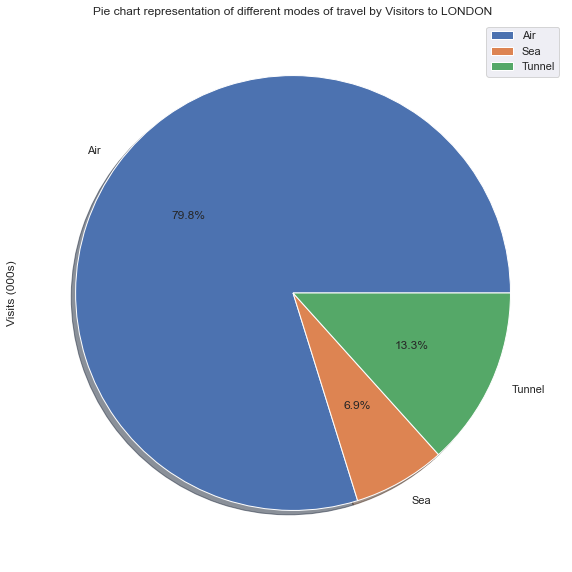

In [20]:
file_data.groupby(['mode']).sum().plot(kind='pie',y='Visits (000s)',radius = 1,title=
 "Pie chart representation of different modes of travel by Visitors to LONDON",autopct='%1.1f%%',shadow=True)

From the above pie chart it could be inferred that, people are using Air transport more than others

# Hypothesis: correlation between visits, nights stayed and the amount spent

Text(0.5, 1.0, 'Correlation Heatmap')

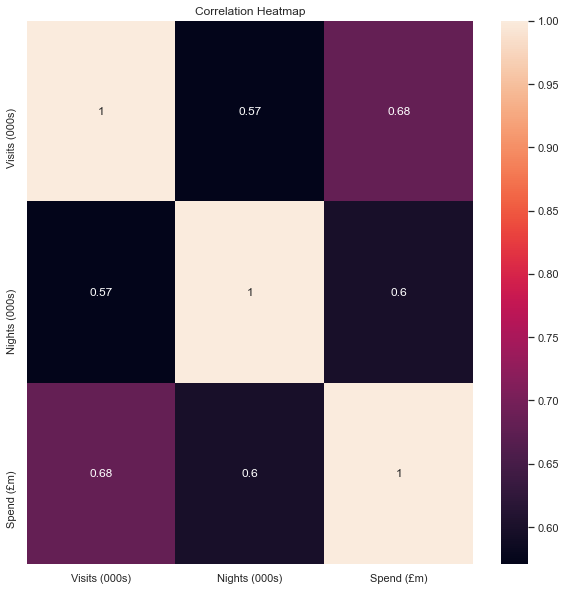

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(file_data[['Visits (000s)','Nights (000s)','Spend (£m)']].corr(), vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

There is correlation between the amount spent and the visits to the london.
There is correlation between the amount spent and the nights stayed.

# Hypothesis: Correlation between the visits and nights stayed

<AxesSubplot:title={'center':'Visits and Nights stayed in London per year'}, xlabel='year', ylabel='Visits and Nights stayed in London'>

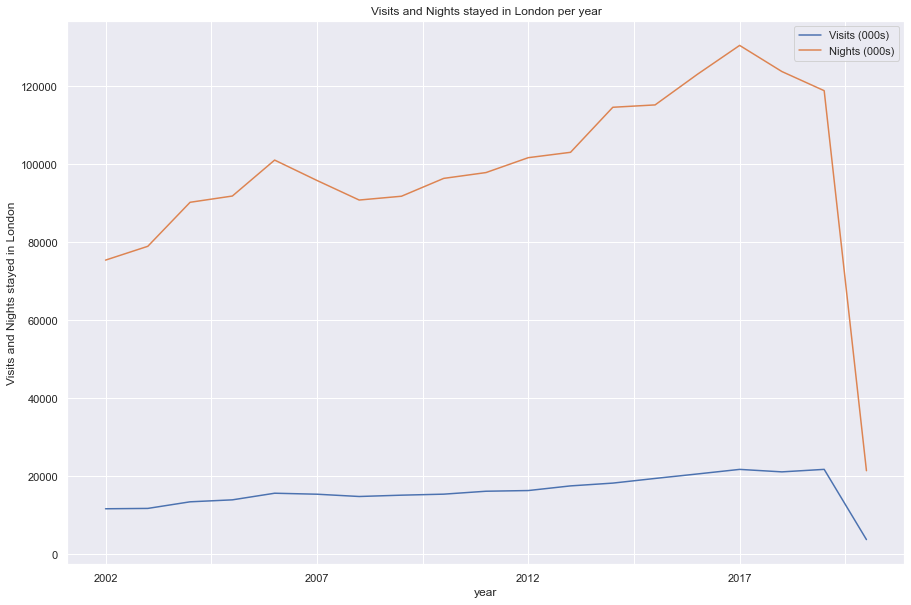

In [54]:
file_data.groupby('year').sum().plot(y=['Visits (000s)','Nights (000s)'],kind="line",ylabel='Visits and Nights stayed in London',title='Visits and Nights stayed in London per year')

Observation:
There is correlation between the visits and the nights stayed during a year

# Hypothesis: Which quarter has the highest amount spent?

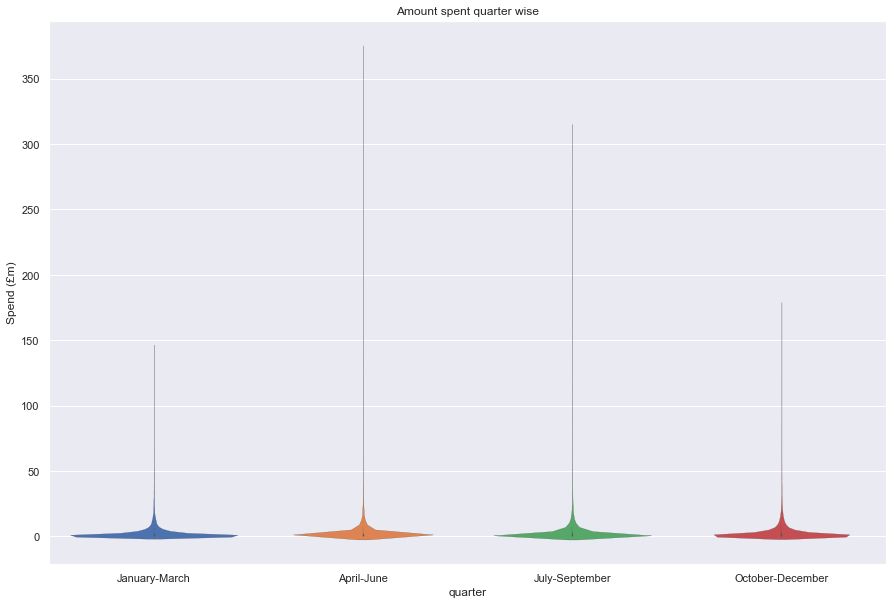

In [37]:
ax = sns.violinplot(y="Spend (£m)",line=None,x='quarter',data=file_data,saturation=75,gridsize=100,linewidth=0.2).set(title='Amount spent quarter wise')

Observation: April - June month has the highest amount spent

# Hypothesis: which year has more number of visitors?

<AxesSubplot:title={'center':'Number of Visitors per year'}, xlabel='year', ylabel='Count of Visitors'>

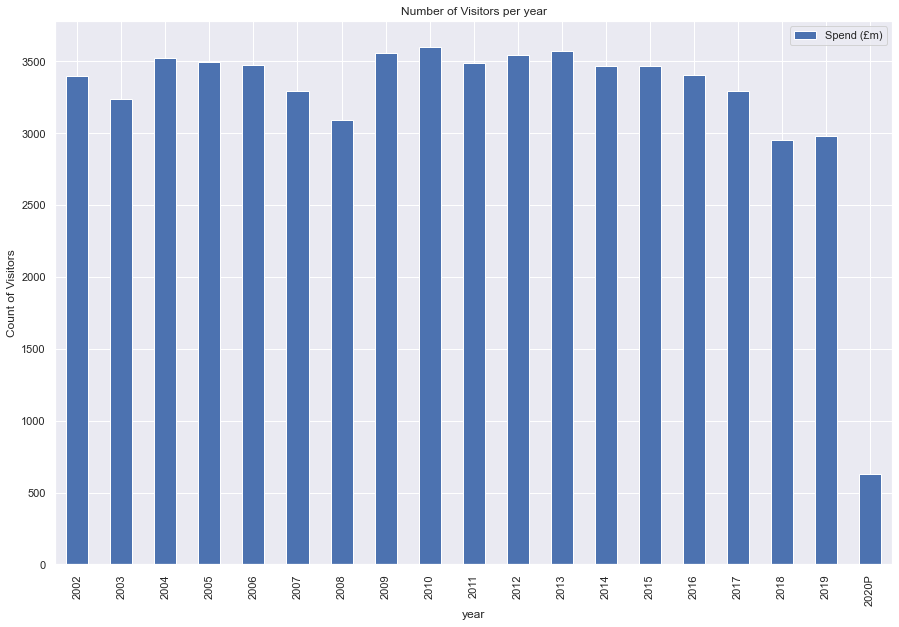

In [50]:
file_data.groupby('year').count().plot(y=['Spend (£m)'],kind="bar",title='Number of Visitors per year',ylabel='Count of Visitors')

It is observed from the bar graph that year 2010 has more number of visitors

# Hypothesis: Which year has more amount spent?

<AxesSubplot:title={'center':'Year wise amount spent for visiting london'}, xlabel='year', ylabel='Amount spent'>

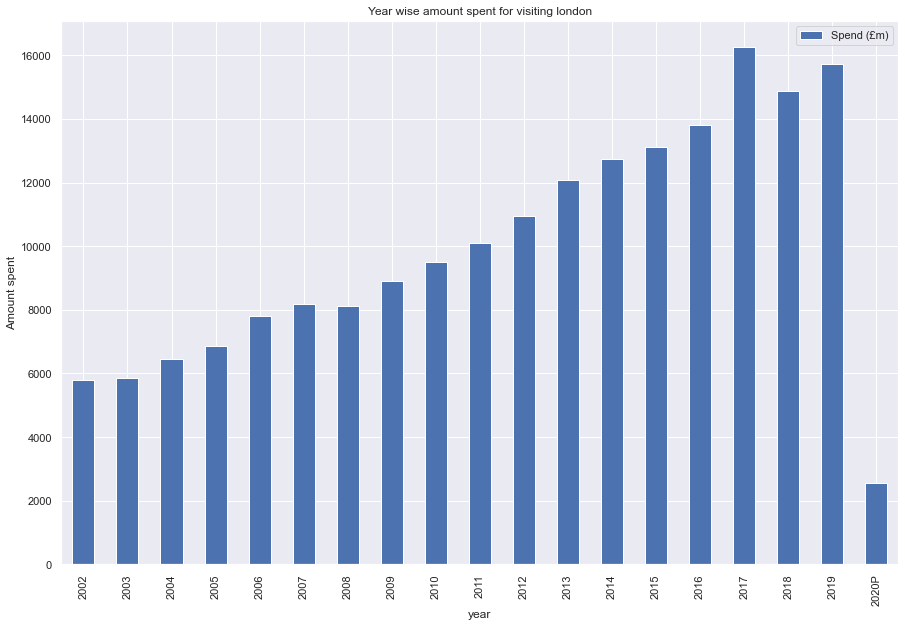

In [51]:
file_data.groupby('year').sum().plot(y=['Spend (£m)'],kind="bar",ylabel='Amount spent',title='Year wise amount spent for visiting london')

From the bar graph it is infered that year 2017 has more amount spent when compared to others and year 2020 has the least

# Hypothesis: Which market has the highest amount spent year wise?

[Text(0.5, 1.0, 'Market wise amount spent per year')]

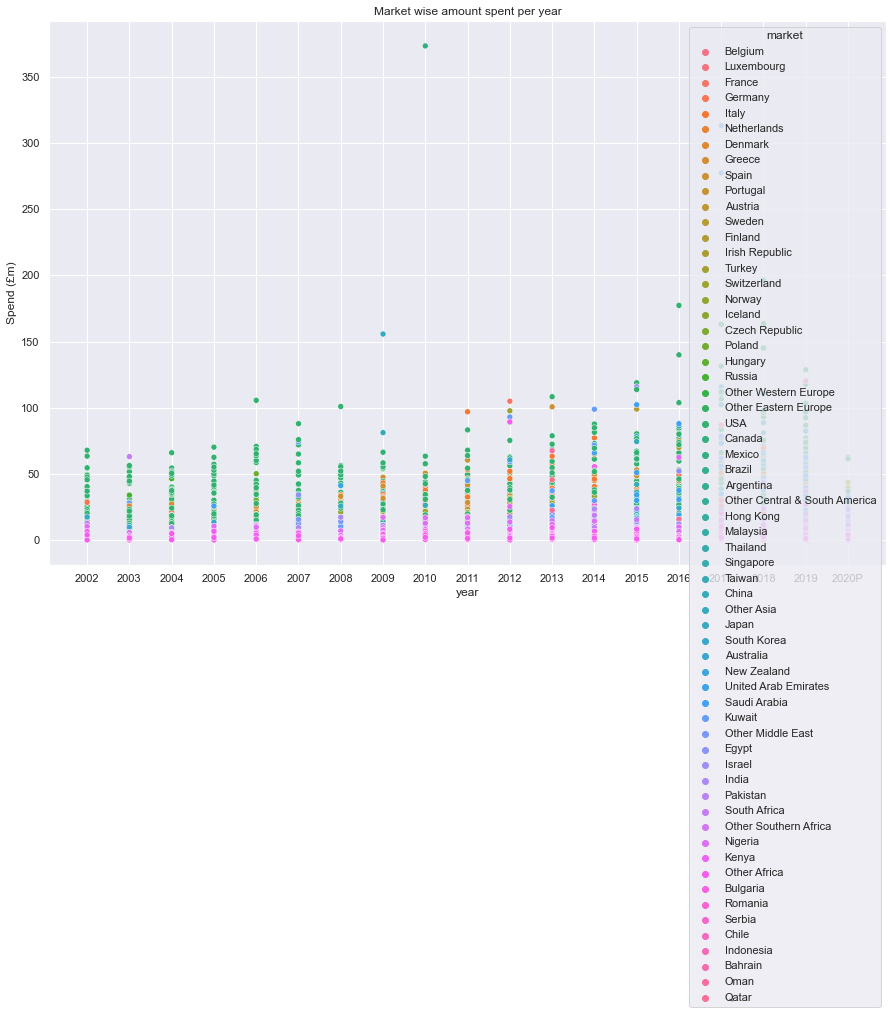

In [52]:
sns.scatterplot(data=file_data,x='year',y='Spend (£m)',ci=None,hue='market').set(title='Market wise amount spent per year')

Observations: It can be observed that Mexico has the highest amount spent in the year 2010

# Hypothesis: Which market has the highest and lowest amount spent overall all the years?

<AxesSubplot:xlabel='market'>

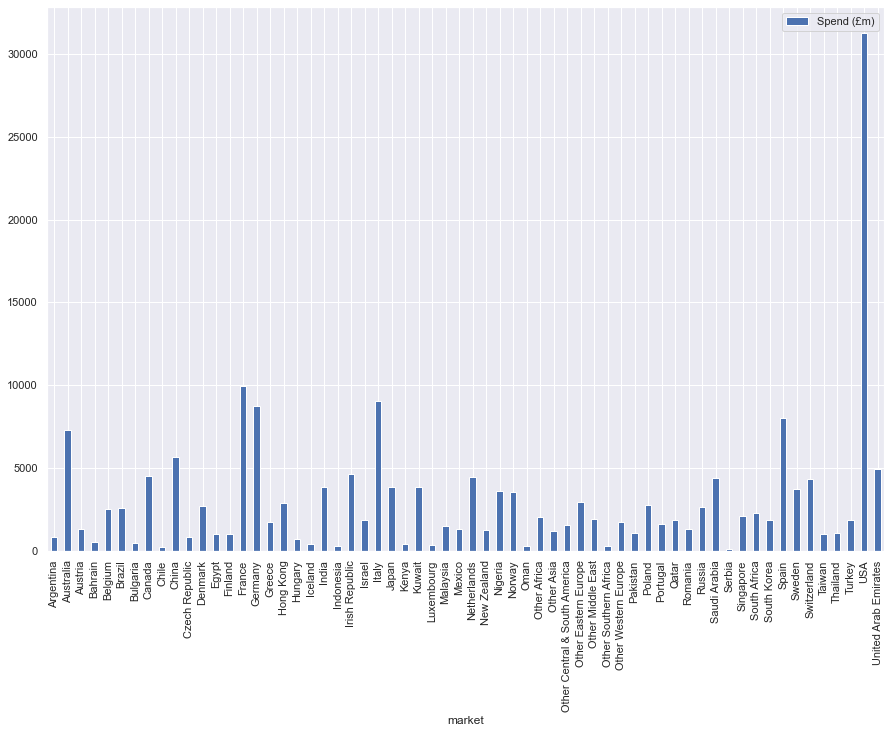

In [48]:
file_data.groupby('market').sum().plot(y='Spend (£m)',kind='bar')

Observation:
1. USA has the highest amount spent when compared to other markets
2. Serbia is the least amount spent country for visiting london